In [149]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [150]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.data.shape)
A = wine.data
for i in range(A.shape[1]):
  A[:,i] =2*((A[:,i]-min(A[:,i]))/(max(A[:,i])-min(A[:,i])))-1

print(wine.target.shape)
C=np.unique(wine.target)
print(C)
print(len(C))
n = wine.data.shape[0]
d = wine.data.shape[1]
y = 1.0*np.ones([A.shape[0],])
for i in range(wine.target.shape[0]):
  if wine.target[i]==1:
    y[i] = 1
  else:
    y[i] = -1
y=y.reshape(n,1)



(178, 13)
(178,)
[0 1 2]
3


There are 3 classes , class labels are from the set {0, 1, . . . , C − 1}  

In [151]:
indexarr = np.arange(n)
np.random.shuffle(indexarr)
print(indexarr)
p80=round(n*0.8)
q=list(indexarr[:p80])
r=list(indexarr[p80:])
train_data = (A[[q],:]).reshape(p80,d)
train_label = y[q].reshape(p80,1)
test_data = (A[[r],:]).reshape((n-p80),d)
test_label =y[r].reshape((n-p80),1)

[ 50  21  52  37  19 127  60  44  32 140  80 151  13 168  45 171  56  26
 167  76  59   1  18  79   9 144  24  36  70 100 124  95 123 153  67  17
  12 108  54 135 120 150  22  74  42 138 139 116 155 154 103  62 122  11
  93 130  87 146 107  39  58 165 174  85 136 137  89  63   2 112 158  33
  61 129  71 157  84 117  78   5 161  77  90   8  27  43 142 177   0 115
 119  94  40  72   4  29 104  64 113  88  31 145  48  23 152  20   7  92
  35  46  96 149  68  51 169  66  99   6 143 102  57 118 148 163 101   3
 172 128  34 125  28  47 173 121  30  65  49  81  15 160 162 109  73 164
  16 133  41  10  53  91  75 106 134  98 105 111  83 126  82 141 110  25
 132  97  86 175  38 147 131 176 170  69 156  14 114 159 166  55]


In [152]:
def predict(w,x):
  h_x=np.sign(np.dot(x,w))
  return h_x

In [153]:
def compute_accuracy(data,labels,model_w):
  prediction=predict(model_w,data)
  s=labels==prediction.reshape(len(labels),1)
  true_prediction = (s == True).sum()
  false_prediction = (s == False).sum()
  accuracy=true_prediction/len(s)
  return accuracy


In [154]:
def compute_orthogonal_projection(z):
  w=np.sign(z)*(np.minimum(1,np.abs(z)))
  d=len(w)
  return w.reshape(d,1)

#Hinge

In [155]:
def compute_loss_h(w,x,y):
  dp=np.dot(x,w)
  hinge_loss = np.mean([max(0, 1-y[i]*dp[i]) for i in range(len(y))])
  return hinge_loss

In [156]:
def compute_objfn(data,labels,model_w,l):
  hinge_loss=compute_loss_h(model_w,data,labels)
  objectfun=(0.5*l*((model_w**2).sum()))/len(labels) + hinge_loss
  return objectfun

In [157]:
def compute_grad_loss_h(x,y,model_w,i,l):
   grad_h=[]
   d=x.shape[1]
   dp=np.dot(x,model_w);
   u = dp*y;
   if(u[i] < 1):
     grad_h=-((x[i]*y[i]).reshape(d,1))+l*model_w
   elif(u[i]>=1):
     grad_h=0+l*model_w
   return (grad_h.reshape(d,1))/len(y)

In [158]:
def OPT1_h(data,label,l, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  objfun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N)
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_h(data,label,w,i,l)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)
      t = t+1
      if t>1e4:
        t = 1
    objfun_val.append(compute_objfn(data,label,w,l))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,objfun_val,test_acc,train_acc


In [159]:
nepochs=500
lambda_set = [1e-3,1e-2,0.1,1,10]
object_epoch_l=[]
test_acc_epoch_l=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_l=[]
for i in range(len(lambda_set)):
  values=OPT1_h(train_data,train_label,lambda_set[i], nepochs,test_data,test_label)
  object_epoch_l.append(values[1])
  test_acc_epoch_l.append(values[2])
  train_acc_epoch_l.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_l=np.array(object_epoch_l).reshape(5,500)
test_accuracy_epoch_l=np.array(test_acc_epoch_l).reshape(5,500)
train_accuracy_epoch_l=np.array(train_acc_epoch_l).reshape(5,500)

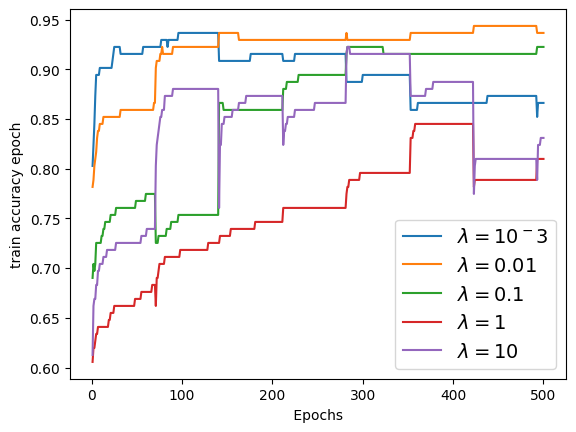

In [160]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_l[0])
plt.plot(epochs, train_acc_epoch_l[1])
plt.plot(epochs, train_acc_epoch_l[2])
plt.plot(epochs, train_acc_epoch_l[3])
plt.plot(epochs, train_acc_epoch_l[4])
plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch")
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

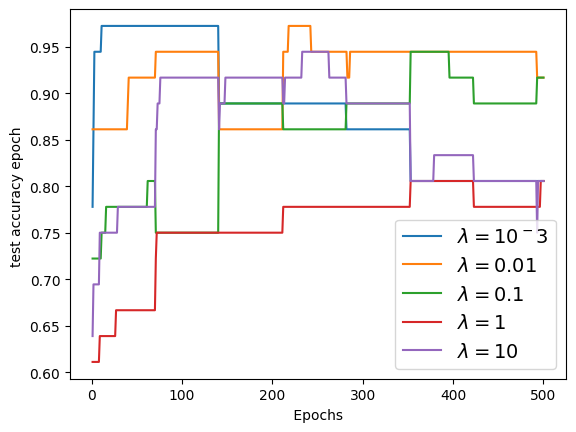

In [161]:
epochs=np.arange(1,501,1)
plt.plot(epochs, test_acc_epoch_l[0])
plt.plot(epochs, test_acc_epoch_l[1])
plt.plot(epochs, test_acc_epoch_l[2])
plt.plot(epochs, test_acc_epoch_l[3])
plt.plot(epochs, test_acc_epoch_l[4])
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch ")
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

In [162]:
data=[]
for i in range(len(lambda_set)):
  data.append([lambda_set[i],final_test_acc[i],final_train_acc[i]])
df = pd.DataFrame(data, columns = ['lambda values','final test acc','final train acc'])

In [163]:
df

lambda values  final test acc  final train acc
0          0.001        0.805556         0.866197
1          0.010        0.916667         0.936620
2          0.100        0.916667         0.922535
3          1.000        0.805556         0.809859
4         10.000        0.805556         0.830986

#Logistic

In [164]:
def compute_loss_L(x,y,w):
  dp=np.dot(x,w)
  logistic_loss = np.mean([np.log(1+np.exp(-(y[i]*dp[i]))) for i in range(len(y))])
  return logistic_loss

In [165]:
def compute_objfn_l(data,labels,model_w,l):
  logistic_loss=compute_loss_L(data,labels,model_w)
  objectfun=(0.5*l*((model_w**2).sum()))/len(labels) + logistic_loss
  return objectfun

In [166]:
def compute_grad_loss_L(x,y,w,i,lamda):
  dp=np.dot(x[i],w)
  d=x.shape[1]
  gradL=(((1+np.exp(-(y[i]*dp)))**(-1))*(np.exp(-(y[i]*dp))))*(x[i])*y[i]
  return (gradL.reshape(d,1))/len(y)

In [167]:
def OPT1_l(data,label,l, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N)
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_L(data,label,w,i,l)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)
      t = t+1
      if t>1e4:
        t = 1
    obj_fun_val.append(compute_objfn_l(data,label,w,l))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc


In [168]:
nepochs=500
lambda_set = [1e-3,1e-2,0.1,1,10]
objval_epoch_l=[]
test_acc_epoch_l=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_l=[]
for i in range(len(lambda_set)):
  values=OPT1_l(train_data,train_label,lambda_set[i], nepochs,test_data,test_label)
  objval_epoch_l.append(values[1])
  test_acc_epoch_l.append(values[2])
  train_acc_epoch_l.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_l=np.array(obj_val_epoch_l).reshape(5,500)
test_acc_epoch_l=np.array(test_accuracy_epoch_l).reshape(5,500)
train_acc_epoch_l=np.array(train_accuracy_epoch_l).reshape(5,500)

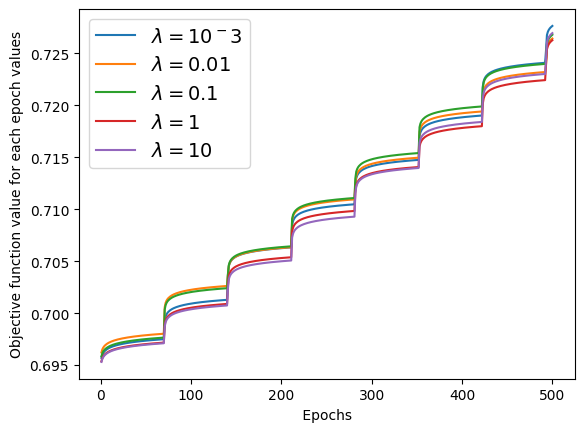

In [169]:
epochs=np.arange(1,501,1)
plt.plot(epochs, objval_epoch_l[0])
plt.plot(epochs, objval_epoch_l[1])
plt.plot(epochs, objval_epoch_l[2])
plt.plot(epochs, objval_epoch_l[3])
plt.plot(epochs, objval_epoch_l[4])


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for each epoch values")
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)

plt.show()

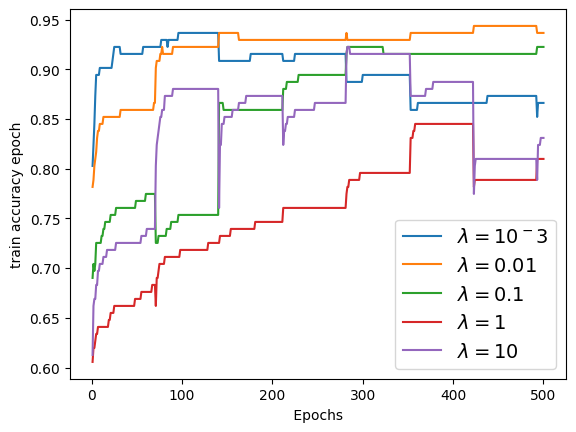

In [170]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_l[0])
plt.plot(epochs, train_acc_epoch_l[1])
plt.plot(epochs, train_acc_epoch_l[2])
plt.plot(epochs, train_acc_epoch_l[3])
plt.plot(epochs, train_acc_epoch_l[4])
plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch")
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

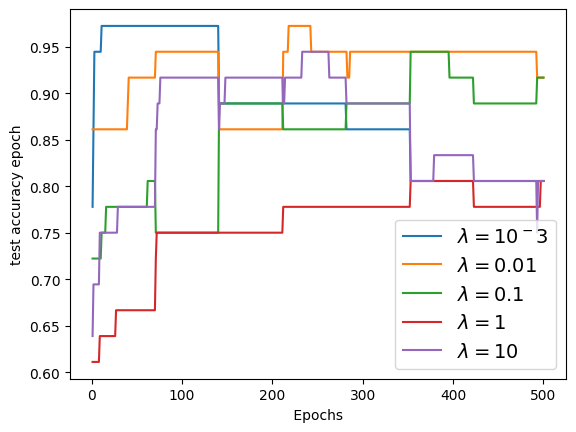

In [171]:
epochs=np.arange(1,501,1)
plt.plot(epochs, test_acc_epoch_l[0])
plt.plot(epochs, test_acc_epoch_l[1])
plt.plot(epochs, test_acc_epoch_l[2])
plt.plot(epochs, test_acc_epoch_l[3])
plt.plot(epochs, test_acc_epoch_l[4])
plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch")
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)
plt.show()

In [172]:
data=[]
for i in range(len(lambda_set)):
  data.append([lambda_set[i],final_test_acc[i],final_train_acc[i]])
df = pd.DataFrame(data, columns = ['lambda values','final test accuracy','final train accuracy'])

In [173]:
df

lambda values  final test accuracy  final train accuracy
0          0.001             0.083333              0.119718
1          0.010             0.055556              0.091549
2          0.100             0.194444              0.183099
3          1.000             0.111111              0.098592
4         10.000             0.111111              0.091549

#SQ Hinge

In [174]:
def compute_loss_Sqh(x,y,w):
  dp=np.dot(x,w)
  squaredhinge_loss =np.mean([(max(0, 1-y[i]*dp[i]))**2 for i in range(len(y))])
  return squaredhinge_loss

1.

In [175]:
def compute_objfnval_Sqh(data,labels,model_w,l):
  squared_hinge_loss=compute_loss_Sqh(data,labels,model_w)
  objectfun=(0.5*l*((model_w**2).sum()))/len(labels) + squared_hinge_loss
  return objectfun

In [176]:
def compute_grad_loss_Sqh(x,y,model_w,i,l):
   grad_Sh=[]
   d=x.shape[1]
   dp=np.dot(x,model_w);
   condition = dp*y;
   if(condition[i] < 1):
     grad_Sh=(2*(1-condition[i])*(-((x[i]*y[i])))).reshape(d,1)+l*model_w
   elif(condition[i]>=1):
     grad_Sh=0+l*model_w
   return (grad_Sh.reshape(d,1))/len(y)

In [177]:
def OPT1_Sh(data,label,lamda, num_epochs,test_data,test_label):
  t = 1
  d=data.shape[1]
  N=data.shape[0]
  obj_fun_val=[]
  test_acc=[]
  train_acc=[]
  w = np.zeros((d,1)).reshape(d,1)
  arr = np.arange(N)
  for epoch in range(num_epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step=1/t
      g_i_x=compute_grad_loss_Sqh(data,label,w,i,lamda)
      w1=w-step*g_i_x
      w=compute_orthogonal_projection(w1)
      t = t+1
      if t>1e4:
        t = 1
    obj_fun_val.append(compute_objfn_l(data,label,w,lamda))
    test_acc.append(compute_accuracy(test_data,test_label,w))
    train_acc.append(compute_accuracy(data,label,w))
  return w,obj_fun_val,test_acc,train_acc


In [178]:
num_epochs=500
l = [1e-3,1e-2,0.1,1,10]
objval_epoch_l=[]
test_acc_epoch_l=[]
final_train_acc=[]
final_test_acc=[]
train_acc_epoch_l=[]
for i in range(len(l)):
  values=OPT1_Sh(train_data,train_label,l[i], num_epochs,test_data,test_label)
  objval_epoch_l.append(values[1])
  test_acc_epoch_l.append(values[2])
  train_acc_epoch_l.append(values[3])
  final_test_acc.append(compute_accuracy(test_data,test_label,values[0]))
  final_train_acc.append(compute_accuracy(train_data,train_label,values[0]))
obj_val_epoch_l=np.array(obj_val_epoch_l).reshape(5,500)
test_acc_epoch_l=np.array(test_accuracy_epoch_l).reshape(5,500)
train_acc_epoch_l=np.array(train_accuracy_epoch_l).reshape(5,500)

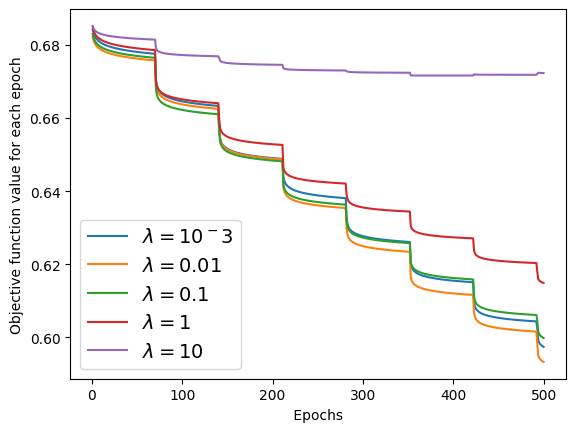

In [179]:
epochs=np.arange(1,501,1)
plt.plot(epochs, objval_epoch_l[0])
plt.plot(epochs, objval_epoch_l[1])
plt.plot(epochs, objval_epoch_l[2])
plt.plot(epochs, objval_epoch_l[3])
plt.plot(epochs, objval_epoch_l[4])


plt.xlabel(" Epochs ")
plt.ylabel("Objective function value for each epoch")
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)

plt.show()

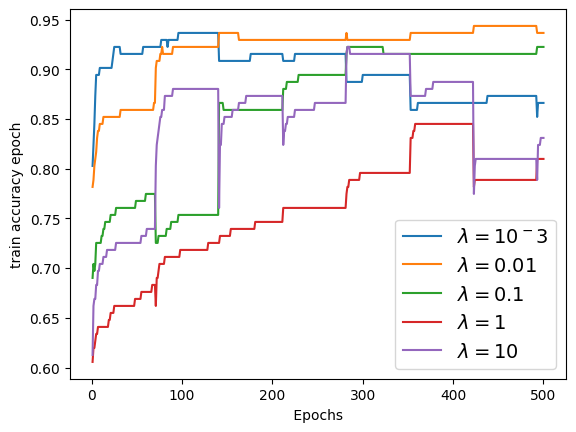

In [180]:
epochs=np.arange(1,501,1)
plt.plot(epochs, train_acc_epoch_l[0])
plt.plot(epochs, train_acc_epoch_l[1])
plt.plot(epochs, train_acc_epoch_l[2])
plt.plot(epochs, train_acc_epoch_l[3])
plt.plot(epochs, train_acc_epoch_l[4])


plt.xlabel(" Epochs ")
plt.ylabel("train accuracy epoch")
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)

plt.show()

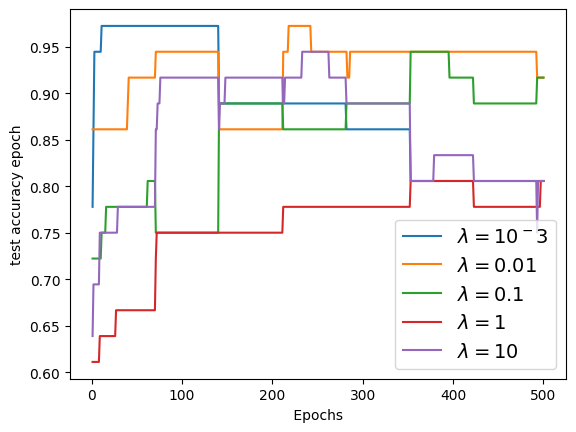

In [181]:
epochs=np.arange(1,501,1)
plt.plot(epochs, test_acc_epoch_l[0])
plt.plot(epochs, test_acc_epoch_l[1])
plt.plot(epochs, test_acc_epoch_l[2])
plt.plot(epochs, test_acc_epoch_l[3])
plt.plot(epochs, test_acc_epoch_l[4])


plt.xlabel(" Epochs ")
plt.ylabel("test accuracy epoch")
plt.legend(["$\lambda=10^-3$", "$\lambda = 0.01$","$\lambda=0.1$", "$\lambda=1$","$\lambda=10$"],fontsize=14)

plt.show()

In [182]:
import pandas as pd
data=[]
for i in range(len(lambda_set)):
  data.append([lambda_set[i],final_test_acc[i],final_train_acc[i]])

In [183]:
df = pd.DataFrame(data, columns = ['lamda values','final test accuracy','final train accuracy'])

In [184]:
df

lamda values  final test accuracy  final train accuracy
0         0.001             0.861111              0.901408
1         0.010             0.916667              0.929577
2         0.100             0.888889              0.908451
3         1.000             0.916667              0.936620
4        10.000             0.805556              0.894366

We can see that the objective function value curve rises for some lamdas at some epochs.

We can see that the accuracy curves for all values of lambda lie within a range.

we can see that has been made is the accuracy changes with every random split of data.